# Loading Libraries

In [2]:
library(ggplot2)
library(dplyr)
library(ggthemes)
library(tidyr)
library(psych)
library(plotly)
library(lime)
library(GGally)
library(performance) 
library(MLmetrics)
library(lmtest)
library(car)
library(DataExplorer)
library(gapminder)
library(hablar)
library(ggcorrplot)
library(rpart)
library(rpart.plot)
library(caret)
library(Metrics)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha



Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout



Attaching package: 'lime'


The following object is masked from 'package:dplyr':

    explain


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'MLmetrics'


The following object is masked from 'package:psych':

    AUC


The following object is masked from 'package:base':

    Recall


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

# Reading Data

In [3]:
data <- read.csv('in-vehicle-coupon-recommendation.csv', na.strings=c(""))

In [4]:
head(data)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,⋯,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,⋯,never,NA,4~8,1~3,1,0,0,0,1,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,⋯,never,NA,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,⋯,never,NA,4~8,1~3,1,1,0,0,1,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,⋯,never,NA,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,⋯,never,NA,4~8,1~3,1,1,0,0,1,0
6,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,⋯,never,NA,4~8,1~3,1,1,0,0,1,1


# Data Pre-Processing

Changing the name of the feature to increase the readability

In [5]:
data <- data %>% rename('coupon_outcome' = 'Y')

Checking the data for missing and NA values

In [6]:
colSums(is.na(data))

destination            passanger              weather 
                   0                    0                    0 
         temperature                 time               coupon 
                   0                    0                    0 
          expiration               gender                  age 
                   0                    0                    0 
       maritalStatus         has_children            education 
                   0                    0                    0 
          occupation               income                  car 
                   0                    0                12576 
                 Bar          CoffeeHouse            CarryAway 
                 107                  217                  151 
RestaurantLessThan20     Restaurant20To50     toCoupon_GEQ5min 
                 130                  189                    0 
   toCoupon_GEQ15min    toCoupon_GEQ25min       direction_same 
                   0                    0                    0 
       direction_opp       coupon_outcome 
                   0                    0

Dropping the car feature as it contains 99% missing values

In [7]:
data$car <- NULL

Removing the rows that contains NA values

In [8]:
data <- data %>% filter(complete.cases(.))

In [9]:
colSums(is.na(data))

destination            passanger              weather 
                   0                    0                    0 
         temperature                 time               coupon 
                   0                    0                    0 
          expiration               gender                  age 
                   0                    0                    0 
       maritalStatus         has_children            education 
                   0                    0                    0 
          occupation               income                  Bar 
                   0                    0                    0 
         CoffeeHouse            CarryAway RestaurantLessThan20 
                   0                    0                    0 
    Restaurant20To50     toCoupon_GEQ5min    toCoupon_GEQ15min 
                   0                    0                    0 
   toCoupon_GEQ25min       direction_same        direction_opp 
                   0                    0                    0 
      coupon_outcome 
                   0

In [10]:
dim(data)

[1] 12079    25

Changing the categorical values into factors

In [11]:
data$gender <- as.factor(data$gender)
data$has_children <- as.factor(data$has_children)
data$education <- as.factor(data$education)
data$occupation <- as.factor(data$occupation)
data$destination <- as.factor(data$destination)
data$passanger <- as.factor(data$passanger)
data$weather <- as.factor(data$weather)
data$toCoupon_GEQ5min <- as.factor(data$toCoupon_GEQ5min)
data$toCoupon_GEQ15min <- as.factor(data$toCoupon_GEQ15min)
data$toCoupon_GEQ25min <- as.factor(data$toCoupon_GEQ25min)
data$direction_same <- as.factor(data$direction_same)
data$direction_opp <- as.factor(data$direction_opp)
data$coupon_outcome <- as.factor(data$coupon_outcome)
data$expiration <- as.factor(data$expiration)
data$coupon <- as.factor(data$coupon)
data$time <- as.factor(data$time)
data$temperature <- as.factor(data$temperature)
data$Bar <- as.factor(data$Bar)
data$CoffeeHouse <- as.factor(data$CoffeeHouse)
data$CarryAway <- as.factor(data$CarryAway)
data$RestaurantLessThan20 <- as.factor(data$RestaurantLessThan20)
data$income <- as.factor(data$income)
data$age <- as.factor(data$age)


In [12]:
data$Restaurant20To50 <- as.factor(data$Restaurant20To50)
data$maritalStatus <- as.factor(data$maritalStatus)

In [13]:
str(data)

'data.frame':	12079 obs. of  25 variables:
 $ destination         : Factor w/ 3 levels "Home","No Urgent Place",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ passanger           : Factor w/ 4 levels "Alone","Friend(s)",..: 1 2 2 2 2 2 2 2 2 2 ...
 $ weather             : Factor w/ 3 levels "Rainy","Snowy",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ temperature         : Factor w/ 3 levels "30","55","80": 2 3 3 3 3 3 3 3 3 3 ...
 $ time                : Factor w/ 5 levels "10AM","10PM",..: 3 1 1 1 3 3 3 3 4 4 ...
 $ coupon              : Factor w/ 5 levels "Bar","Carry out & Take away",..: 4 3 1 2 3 3 3 4 3 4 ...
 $ expiration          : Factor w/ 2 levels "1d","2h": 1 2 1 2 1 2 1 1 2 2 ...
 $ gender              : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ age                 : Factor w/ 8 levels "21","26","31",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ maritalStatus       : Factor w/ 5 levels "Divorced","Married partner",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ has_children        : Factor w/ 2 levels "0","1": 1 1

In [14]:
summary(data)

          destination       passanger     weather     temperature   time     
 Home           :3085   Alone    :6969   Rainy:1147   30:2195     10AM:2158  
 No Urgent Place:5970   Friend(s):3148   Snowy:1331   55:3662     10PM:1903  
 Work           :3024   Kid(s)   : 938   Sunny:9601   80:6222     2PM :1916  
                        Partner  :1024                            6PM :3078  
                                                                  7AM :3024  
                                                                             
                                                                             
                   coupon     expiration    gender          age      
 Bar                  :1913   1d:6760    Female:6199   21     :2537  
 Carry out & Take away:2280   2h:5319    Male  :5880   26     :2399  
 Coffee House         :3816                            31     :1925  
 Restaurant(<20)      :2653                            50plus :1732  
 Restaurant(20-50)    :141

# Exploratory Data Analysis

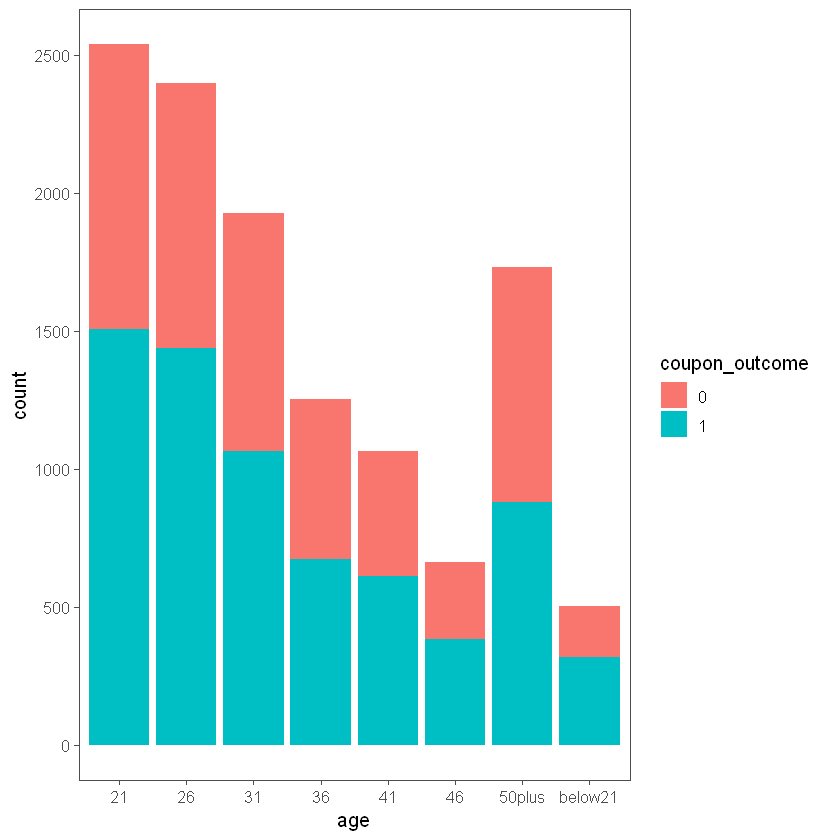

In [15]:
ggplot(data=data, mapping = aes(x=age, fill=coupon_outcome)) + geom_bar()+theme_few()

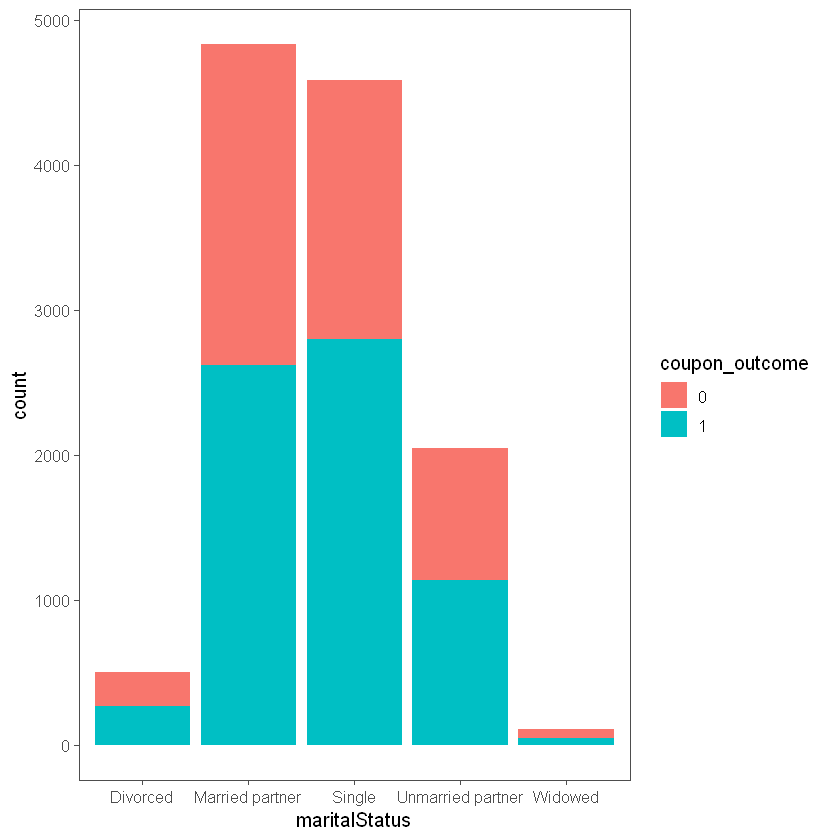

In [16]:
ggplot(data=data, mapping = aes(x=maritalStatus, fill=coupon_outcome)) + geom_bar()+theme_few()

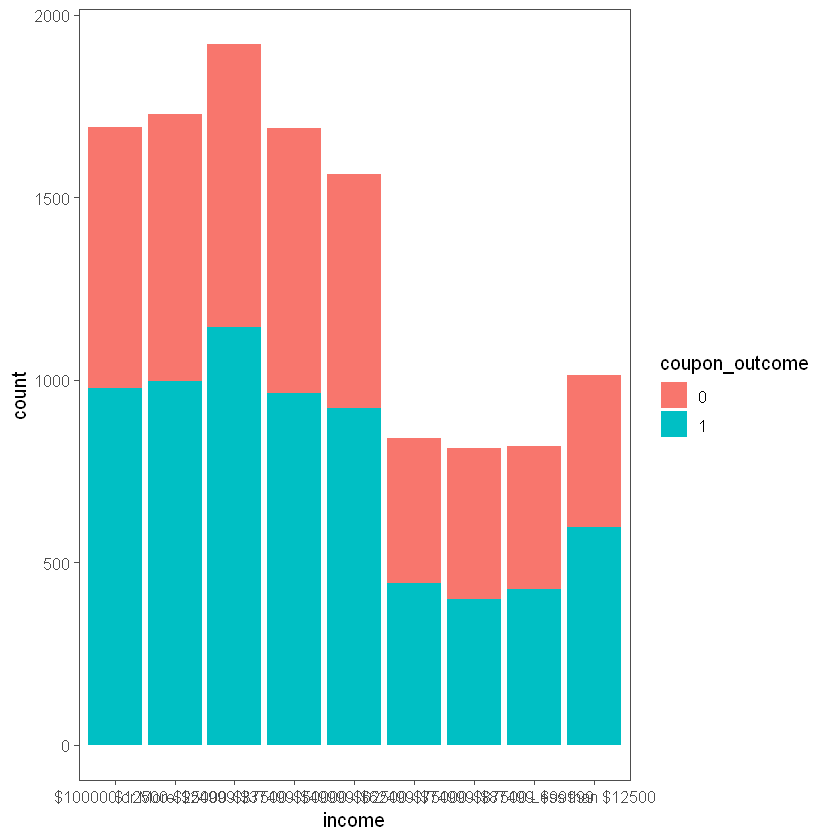

In [17]:
ggplot(data=data, mapping = aes(x=income, fill=coupon_outcome)) + geom_bar()+theme_few()

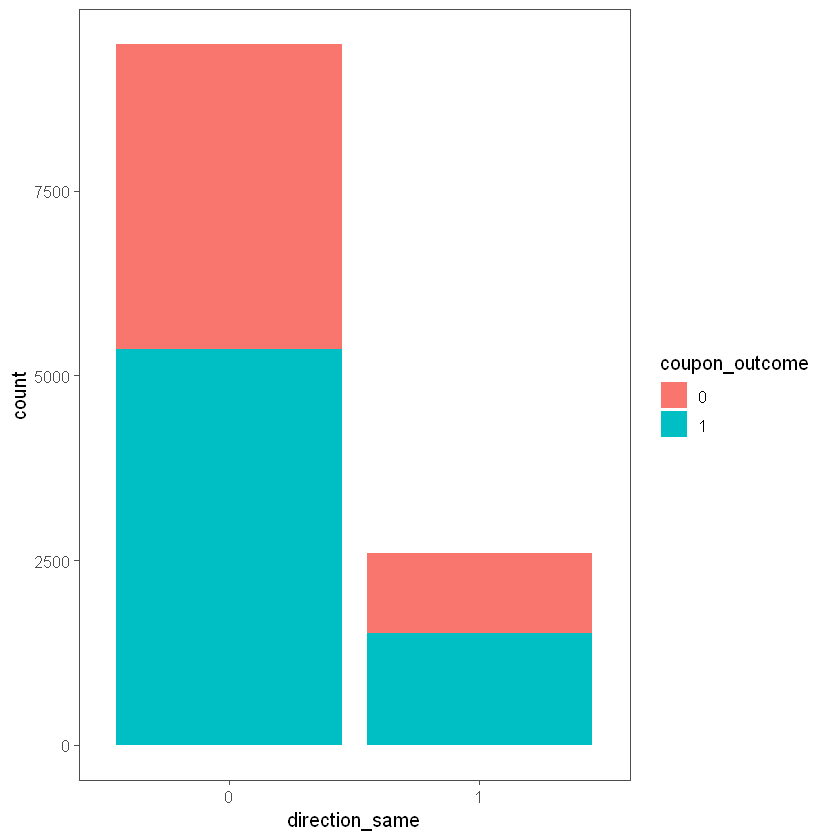

In [18]:
ggplot(data=data, mapping = aes(x=direction_same, fill=coupon_outcome)) + geom_bar()+theme_few()

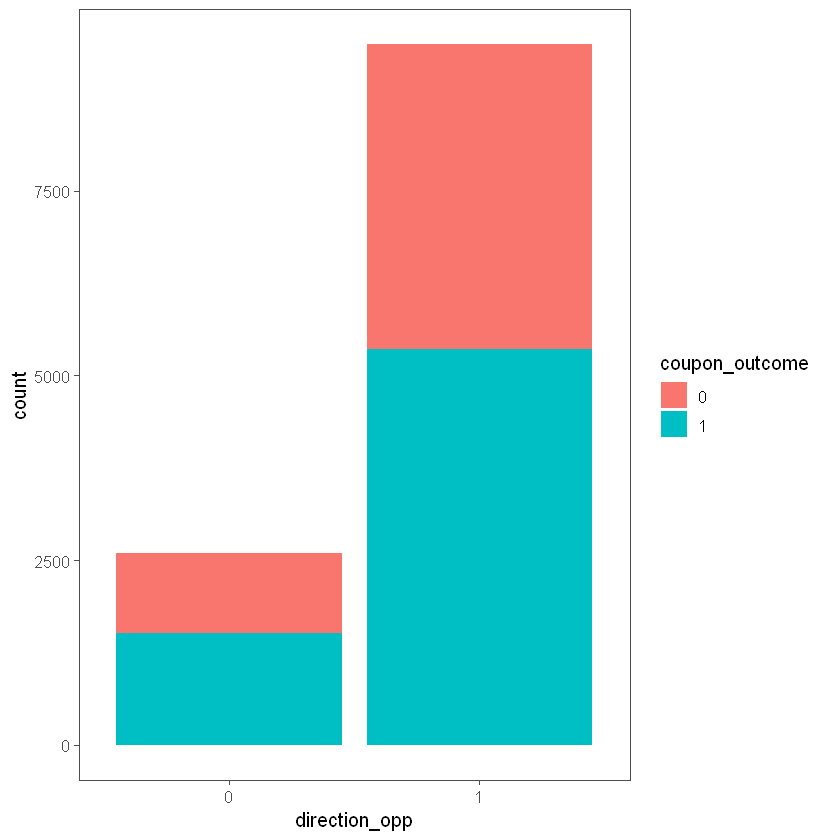

In [19]:
ggplot(data=data, mapping = aes(x=direction_opp, fill=coupon_outcome)) + geom_bar()+theme_few()

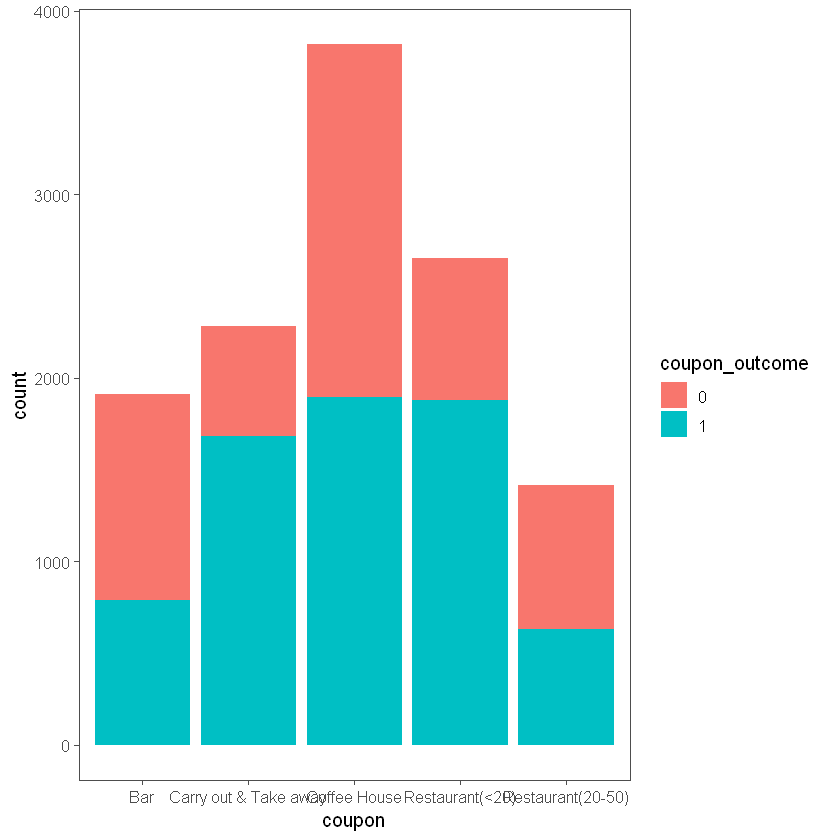

In [20]:
ggplot(data=data, mapping = aes(x=coupon, fill=coupon_outcome)) + geom_bar()+theme_few()

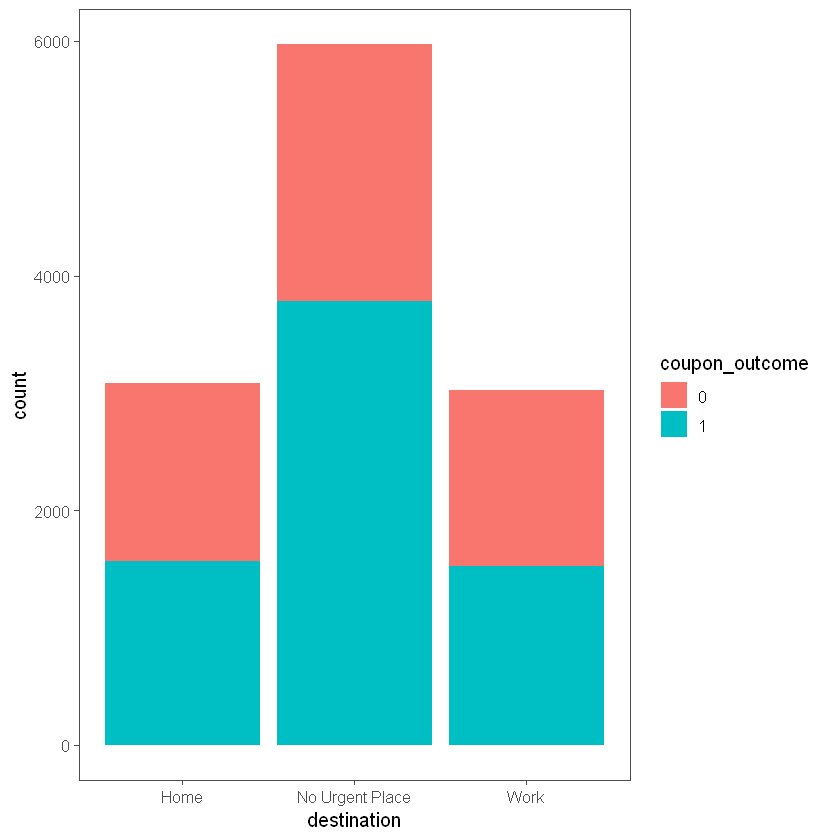

In [21]:
ggplot(data=data, mapping = aes(x=destination, fill=coupon_outcome)) + geom_bar()+theme_few()

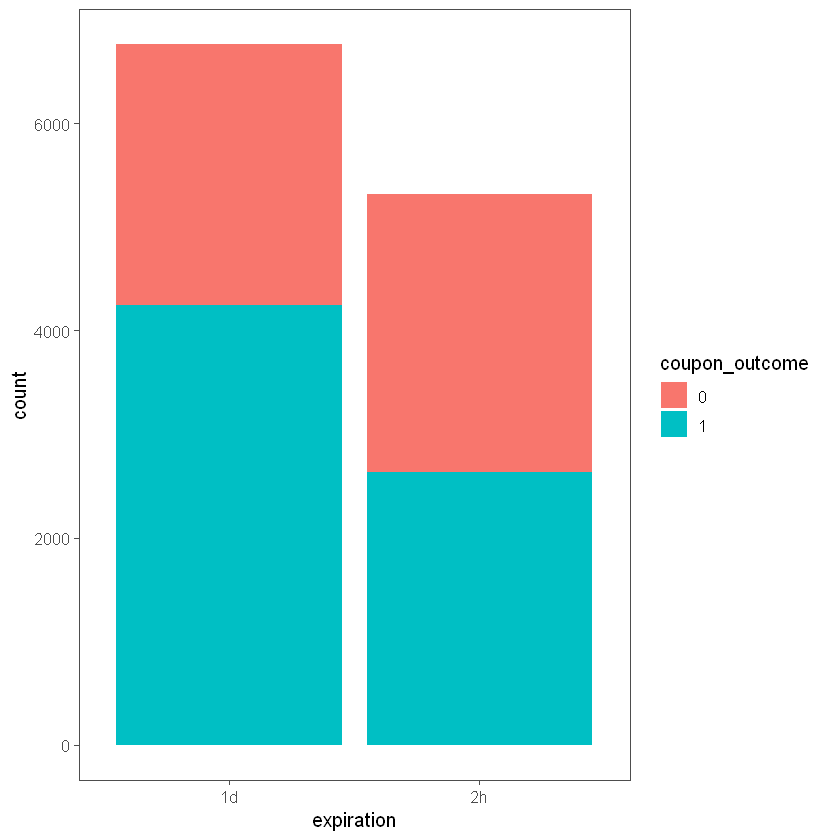

In [22]:
ggplot(data=data, mapping = aes(x=expiration, fill=coupon_outcome)) + geom_bar()+theme_few()

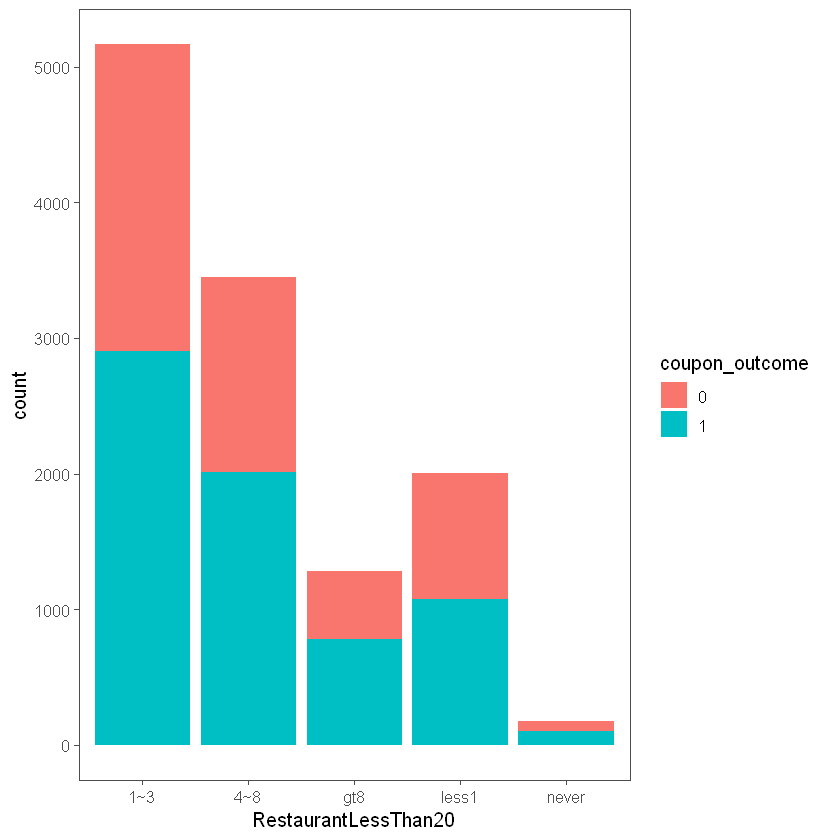

In [23]:
ggplot(data=data, mapping = aes(x=RestaurantLessThan20, fill=coupon_outcome)) + geom_bar()+theme_few()

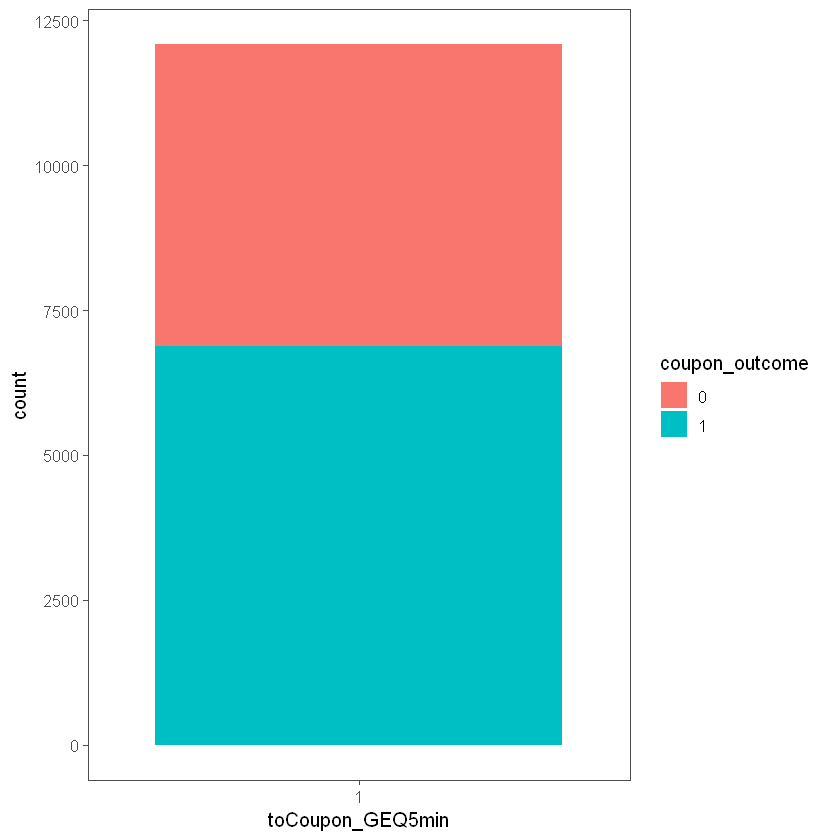

In [24]:
ggplot(data=data, mapping = aes(x=toCoupon_GEQ5min, fill=coupon_outcome)) + geom_bar()+theme_few()

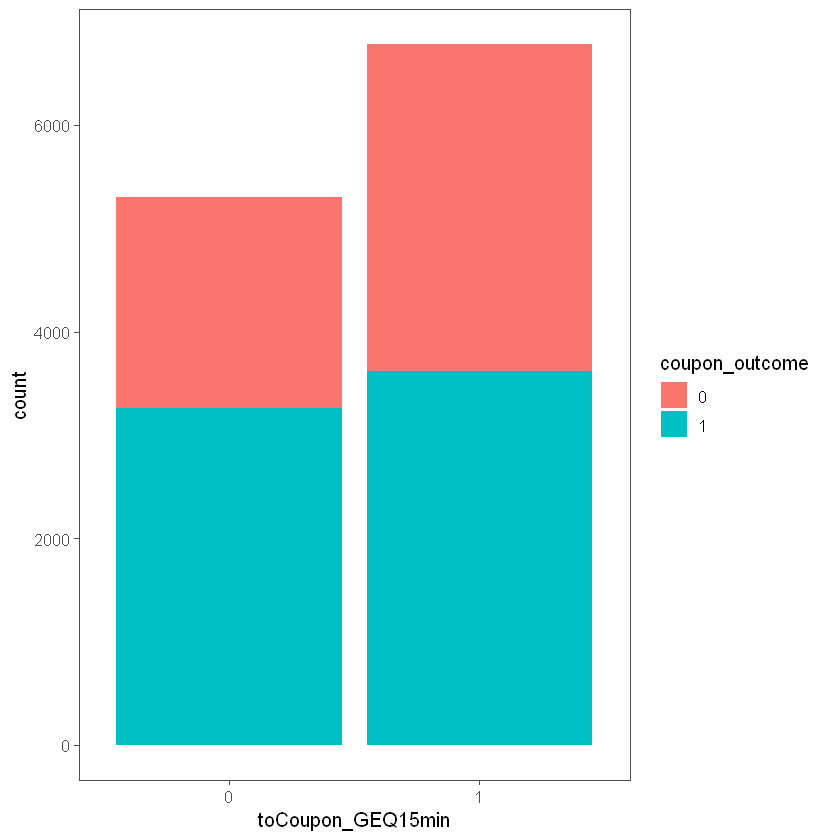

In [25]:
ggplot(data=data, mapping = aes(x=toCoupon_GEQ15min, fill=coupon_outcome)) + geom_bar()+theme_few()

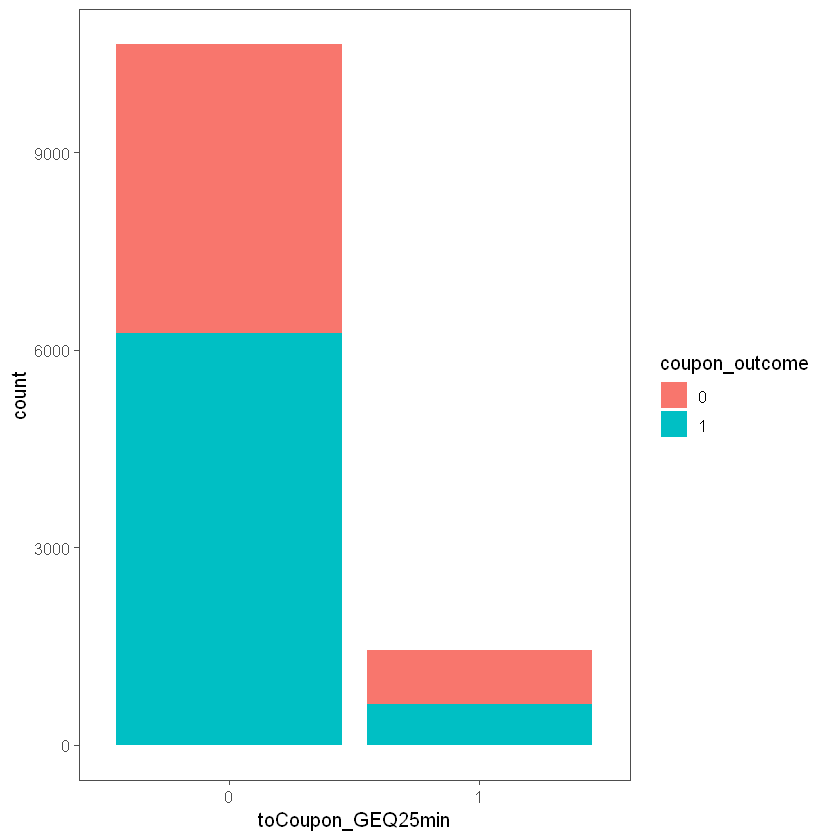

In [26]:
ggplot(data=data, mapping = aes(x=toCoupon_GEQ25min, fill=coupon_outcome)) + geom_bar()+theme_few()

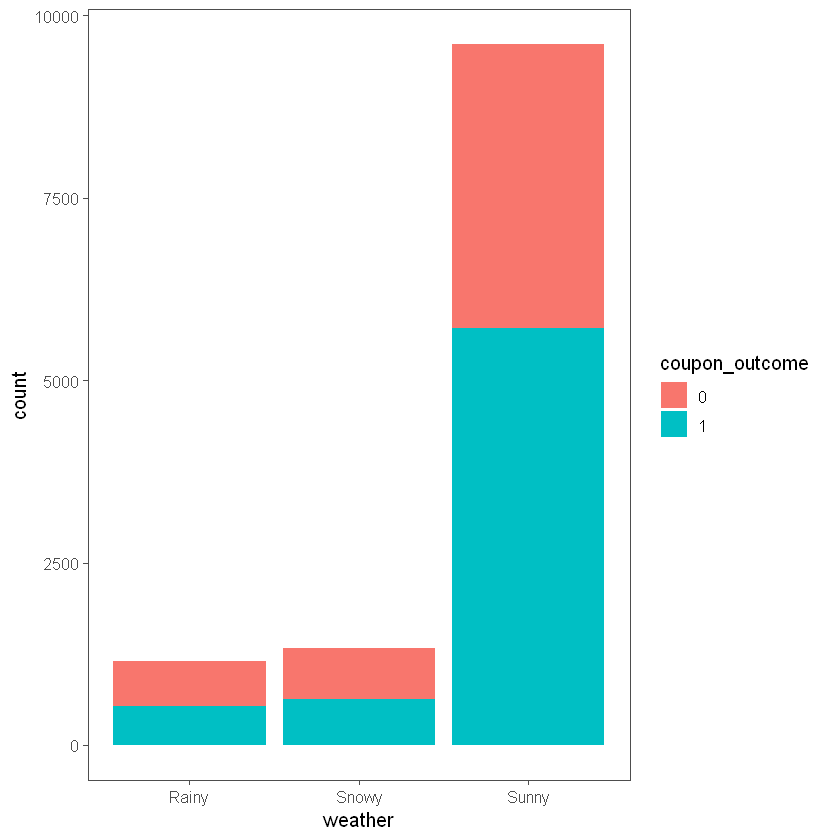

In [27]:
ggplot(data=data, mapping = aes(x=weather, fill=coupon_outcome)) + geom_bar()+theme_few()

# Data Transformation

Dropping the direction_opp as it is corelated with direction_same as we can see above

In [28]:
data$direction_opp <- NULL

# Model Building and Evaluation

In [29]:
set.seed(123)
index <- sample(2, nrow(data), prob=c(0.8, 0.2), replace=TRUE)
data_train <- data[index==1,]
data_test <- data[index==2,]

In [30]:
model1 <- rpart(formula =coupon_outcome ~ ., data=data_train, method = 'class' )

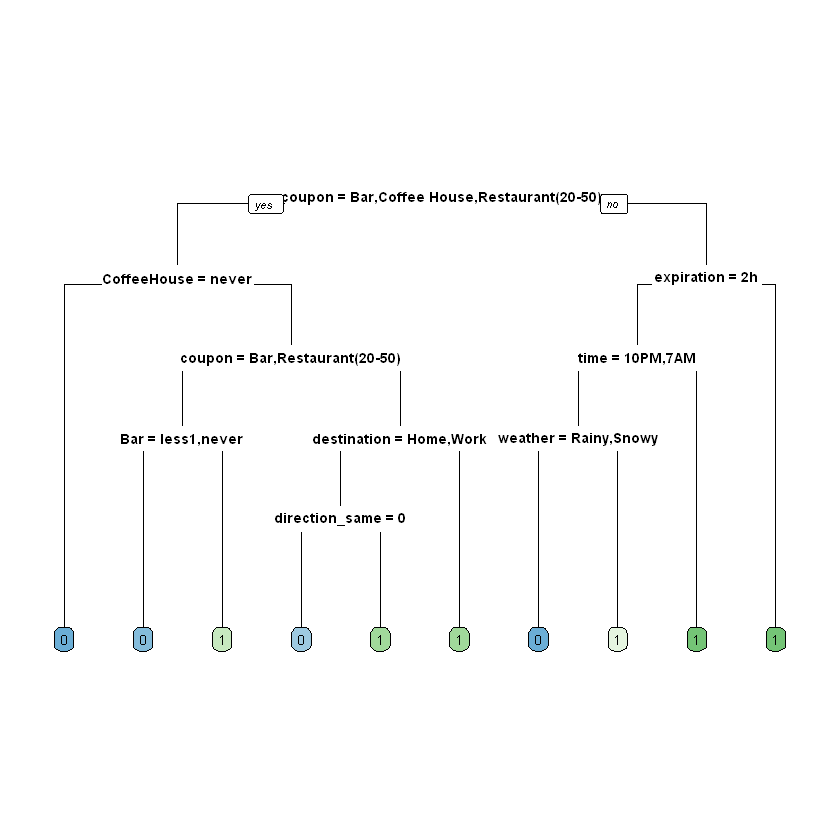

In [31]:
rpart.plot(x= model1, type = 0, extra = 0)

In [32]:
pred <- predict(object = model1, newdata = data_test, type='class')

In [33]:
confusionMatrix(data = pred, reference=data_test$coupon_outcome)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0  595  298
         1  418 1060
                                          
               Accuracy : 0.698           
                 95% CI : (0.6791, 0.7165)
    No Information Rate : 0.5728          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3735          
                                          
 Mcnemar's Test P-Value : 8.698e-06       
                                          
            Sensitivity : 0.5874          
            Specificity : 0.7806          
         Pos Pred Value : 0.6663          
         Neg Pred Value : 0.7172          
             Prevalence : 0.4272          
         Detection Rate : 0.2509          
   Detection Prevalence : 0.3766          
      Balanced Accuracy : 0.6840          
                                          
       'Positive' Class : 0               
                        

In [34]:
accuracy(actual = data_test$coupon_outcome, predicted = pred)

[1] 0.6980177

In [35]:
#training model on the basis of gini-based splitting criteria 

In [36]:
gini_model1 <- rpart(formula =coupon_outcome ~ ., data=data_train, method = 'class', parms = list(split = 'gini') )

In [37]:
pred_gini <- predict(object = gini_model1, newdata = data_test, type='class')

In [38]:
accuracy(actual = data_test$coupon_outcome, predicted = pred_gini)

[1] 0.6980177

In [39]:
#training the model based on information gain splitting criteria

In [40]:
information_model1 <- rpart(formula =coupon_outcome ~ ., data=data_train, method = 'class', parms = list(split = 'information') )

In [41]:
pred_information <- predict(object = information_model1, newdata = data_test, type='class')

In [42]:
accuracy(actual = data_test$coupon_outcome, predicted = pred_information)

[1] 0.7022353

In [43]:
precision <- posPredValue(pred_information, data_test$coupon_outcome, positive="1")

recall <- sensitivity(pred_information, data_test$coupon_outcome, positive="1")


F1 <- (2 * precision * recall) / (precision + recall)
print(paste('Precision', precision))
print(paste('Recall', recall))
print(paste('F1 Score', F1))

[1] "Precision 0.730225988700565"
[1] "Recall 0.761413843888071"
[1] "F1 Score 0.745493871665465"


In [44]:
confusionMatrix(data = pred_information, reference=data_test$coupon_outcome)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0  631  324
         1  382 1034
                                          
               Accuracy : 0.7022          
                 95% CI : (0.6834, 0.7206)
    No Information Rate : 0.5728          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.3871          
                                          
 Mcnemar's Test P-Value : 0.03193         
                                          
            Sensitivity : 0.6229          
            Specificity : 0.7614          
         Pos Pred Value : 0.6607          
         Neg Pred Value : 0.7302          
             Prevalence : 0.4272          
         Detection Rate : 0.2661          
   Detection Prevalence : 0.4028          
      Balanced Accuracy : 0.6922          
                                          
       'Positive' Class : 0               
                        

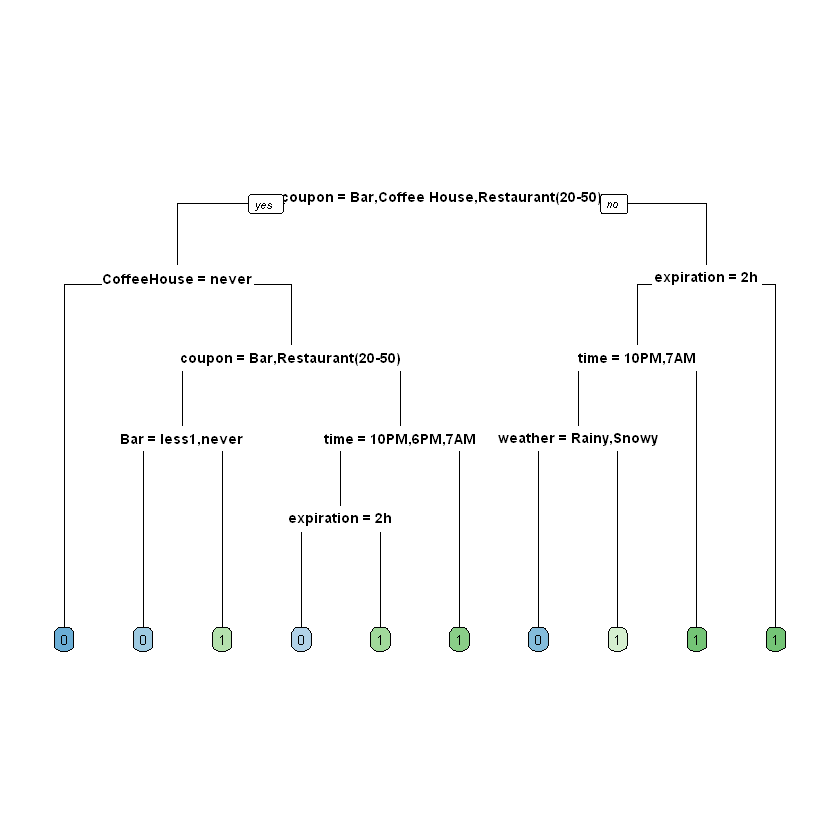

In [46]:
rpart.plot(x= information_model1, type = 0, extra = 0)

In [47]:
#Hyper parameter grid search

In [48]:
#setting values for minsplit and maxdepth

In [49]:
# Generating a search grid
minsplit <- seq(1,20,1)
maxdepth<- seq(1,20,1)
hyperparam_grid <- expand.grid(minsplit = minsplit, maxdepth=maxdepth)

In [50]:
# Number of models in the grid
num_models <- nrow(hyperparam_grid)
num_models

[1] 400

In [51]:
#creating a loop to iterate over the rows of grid to train the models
grid_models <- list()
for (i in 1:num_models) {
    minsplit <- hyperparam_grid$minsplit[i]
    maxdepth <- hyperparam_grid$maxdepth[i]
    # Training the model and storing in the list
    grid_models[[i]] <- rpart(formula =coupon_outcome ~ ., data=data_train, 
                              method = 'class', minsplit=minsplit, maxdepth=maxdepth)                
}

In [52]:
num_models <- length(grid_models)

In [53]:
accuracy_values <- c()

In [54]:
for (i in 1:num_models) {
#Retrive the model i from the list
    model <- grid_models[[i]]
    #Generating the predictions on the test data
    pred <- predict(object = model, newdata = data_test, type='class')
    #computing the accuracies and add them to empty vector
    accuracy_values[i] <- accuracy(actual = data_test$coupon_outcome, predicted = pred)
}

In [55]:
#finding which model has maximum accuracy
best_model <- grid_models[[which.max(accuracy_values)]]

In [56]:
pred <- predict(object = best_model, newdata = data_test, type='class')

In [57]:
accuracy(actual = data_test$coupon_outcome, predicted = pred)

[1] 0.6980177

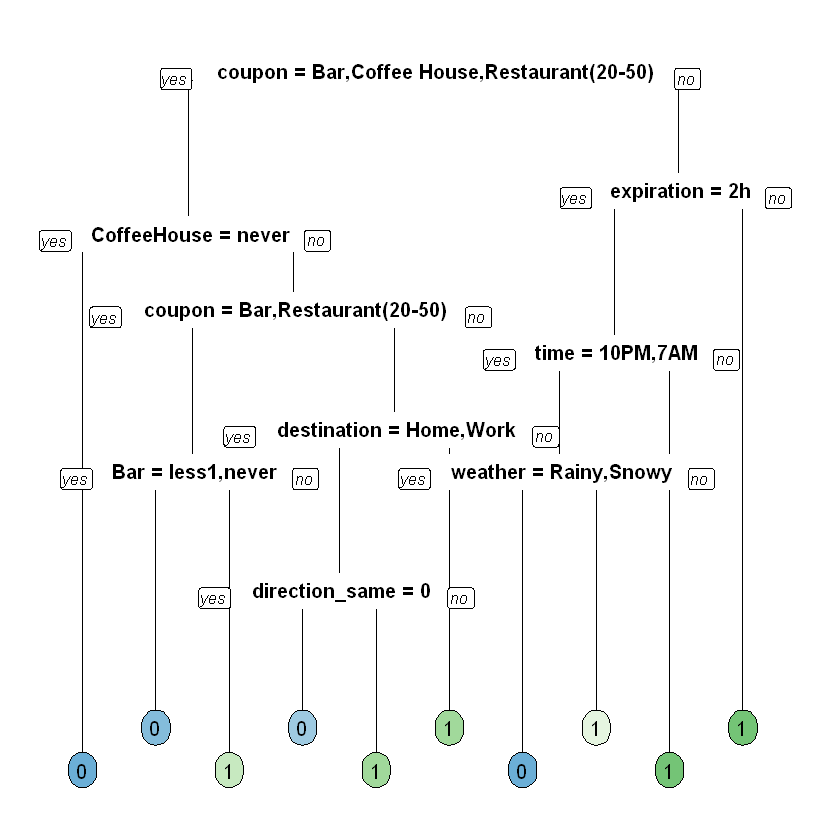

In [58]:
rpart.plot(x= best_model, yesno= 2, type = 0, extra = 0)

In [59]:
confusionMatrix(data = pred, reference=data_test$coupon_outcome)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0  595  298
         1  418 1060
                                          
               Accuracy : 0.698           
                 95% CI : (0.6791, 0.7165)
    No Information Rate : 0.5728          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3735          
                                          
 Mcnemar's Test P-Value : 8.698e-06       
                                          
            Sensitivity : 0.5874          
            Specificity : 0.7806          
         Pos Pred Value : 0.6663          
         Neg Pred Value : 0.7172          
             Prevalence : 0.4272          
         Detection Rate : 0.2509          
   Detection Prevalence : 0.3766          
      Balanced Accuracy : 0.6840          
                                          
       'Positive' Class : 0               
                        